In [18]:
# 1. Установка и импорт необходимых библиотек
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


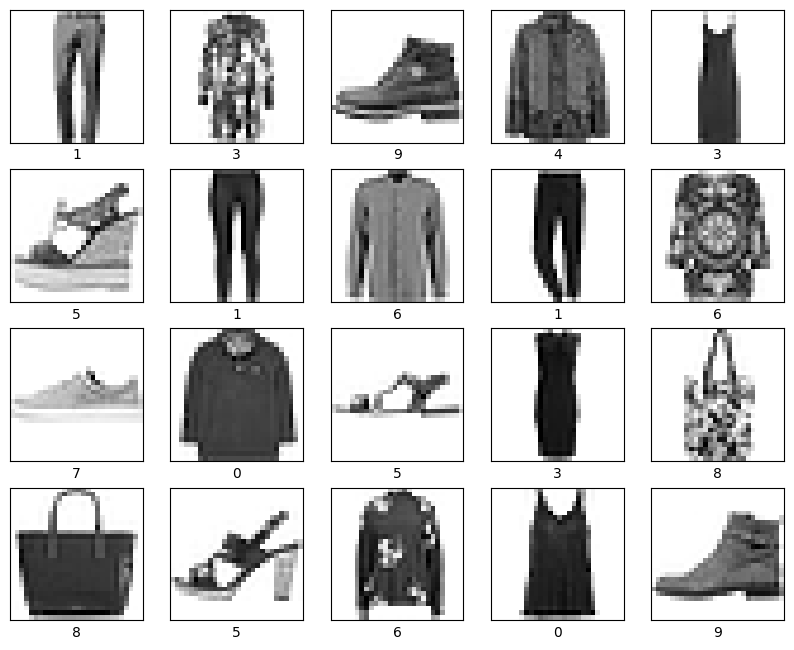

In [19]:
# 2. Загрузка и просмотр набора данных
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Вывод размеров данных
print(X_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(X_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

# Вывод части обучающих изображений и меток
image_number = random.randint(0, len(X_train) - 20)
plt.figure(figsize=(10, 10))
for i in range(image_number, image_number + 20):
    plt.subplot(5, 5, i - image_number + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [20]:
# 3. Подготовка данных

batch_size, img_rows, img_cols = 64, 28, 28  # Размер изображения

# Преобразуем данные для подачи в нейросеть (размерность: количество, высота, ширина, каналы)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

# Нормализуем данные (преобразуем в диапазон от 0 до 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# Преобразуем метки в категории (one-hot encoding)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [21]:
# 4. Создание модели CNN

model = Sequential()

# Слой свертки
model.add(Conv2D(75, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
# Слой максимального подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout для предотвращения переобучения
model.add(Dropout(0.2))

# Еще один слой свертки
model.add(Conv2D(100, (5, 5), activation='relu'))
# Еще один слой максимального подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout
model.add(Dropout(0.2))

# Преобразование в вектор
model.add(Flatten())

# Полносвязный слой
model.add(Dense(500, activation='relu'))
# Dropout
model.add(Dropout(0.5))

# Выходной слой с 10 нейронами (для 10 классов)
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 75)          │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 100)           │         187,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 100)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         800,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,985,182 (11.39 MB)

 Trainable params: 995,060 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,990,122 (7.59 MB)

In [22]:
# 5. Компиляция модели

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
# 6. Обучение модели

history = model.fit(X_train,
                    Y_train,
                    batch_size=200,
                    epochs=10,
                    validation_split=0.2,
                    verbose=2)

# Сохранение модели
model.save('Model_MNIST_CNN.hdf5')

Epoch 1/10
240/240 - 163s - 681ms/step - accuracy: 0.7705 - loss: 0.6341 - val_accuracy: 0.8587 - val_loss: 0.3910
Epoch 2/10
240/240 - 201s - 836ms/step - accuracy: 0.8600 - loss: 0.3857 - val_accuracy: 0.8796 - val_loss: 0.3255
Epoch 3/10
240/240 - 201s - 839ms/step - accuracy: 0.8805 - loss: 0.3337 - val_accuracy: 0.8882 - val_loss: 0.3036
Epoch 4/10
240/240 - 197s - 821ms/step - accuracy: 0.8890 - loss: 0.3014 - val_accuracy: 0.9011 - val_loss: 0.2773
Epoch 5/10
240/240 - 204s - 852ms/step - accuracy: 0.8992 - loss: 0.2753 - val_accuracy: 0.8982 - val_loss: 0.2794
Epoch 6/10
240/240 - 157s - 655ms/step - accuracy: 0.9030 - loss: 0.2631 - val_accuracy: 0.9012 - val_loss: 0.2647
Epoch 7/10
240/240 - 203s - 846ms/step - accuracy: 0.9084 - loss: 0.2481 - val_accuracy: 0.9111 - val_loss: 0.2424
Epoch 8/10
240/240 - 156s - 652ms/step - accuracy: 0.9128 - loss: 0.2351 - val_accuracy: 0.9126 - val_loss: 0.2400
Epoch 9/10
240/240 - 206s - 858ms/step - accuracy: 0.9166 - loss: 0.2227 - val_a

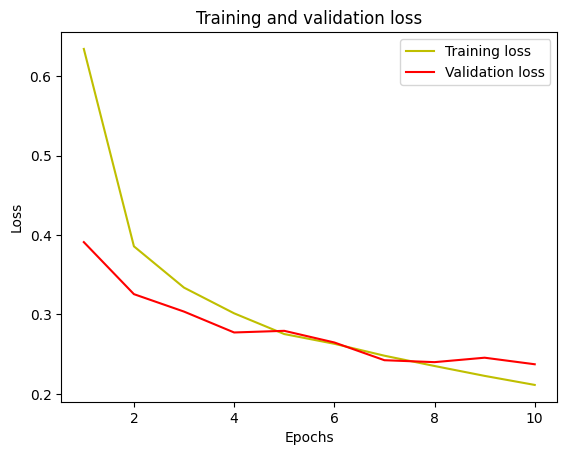

Test score: 0.252014
Test accuracy: 0.906000


In [24]:
# 7. Оценка модели

# Построение графиков потерь
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Оценка качества на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test score: {scores[0]:.6f}")
print(f"Test accuracy: {scores[1]:.6f}")